In [12]:
from array import array
import math
import numpy as np
import random

In [13]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

def fitfunction(x,*paramlist):
    fitval = 0.0
    for i in range(len(paramlist)):
        fitval += paramlist[i]*x**i
    return fitval

par = array('d')
par.append(0.4321)
par.append(1.6789)
par.append(0.50)
par.append(1.0000)

In [14]:
n = 15 #Set the number of data points

In [15]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [16]:
for i in range(0,n):
    x.append(i+1)
    y.append(generator_function(x[i],par) + 10.0*random.gauss(0.0,1.0))
    ex.append(0.0)
    ey.append(5.0*math.sqrt(math.fabs(y[i])))

/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_82953/708837061.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_82953/708837061.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))


chi2/dof = 186.869206 / 13.000000
Coefficients with Errors:
p0 = -187.338710 +/- 16.108096
p1 = 109.855030 +/- 5.549443
[0.0, 0.0]
[-187.33870861  109.85502991] [[259.47075108 -68.27616589]
 [-68.27616589  30.79632162]]
Coefficients (from curve_fit)
[-187.33870861  109.85502991]
Covariance Matrix (from curve_fit)
[[259.47075108 -68.27616589]
 [-68.27616589  30.79632162]]
Chi^2 / dof = 1.869E+02 / 13
Fit Parameter 0: -1.873E+02 +/- 1.611E+01
0 1 -7.638E-01
Fit Parameter 1: 1.099E+02 +/- 5.549E+00
chi2/dof = 9.374701 / 12.000000
Coefficients with Errors:
p0 = 60.339484 +/- 24.598459
p1 = -71.171829 +/- 14.677392
p2 = 18.238058 +/- 1.368945
[0.0, 0.0, 0.0]
[ 60.33948363 -71.17182849  18.23805771] [[ 605.08420388 -320.88346077   25.44962909]
 [-320.88346077  215.42583935  -18.60101756]
 [  25.44962909  -18.60101756    1.87401158]]
Coefficients (from curve_fit)
[ 60.33948363 -71.17182849  18.23805771]
Covariance Matrix (from curve_fit)
[[ 605.08420388 -320.88346077   25.44962909]
 [-320.883

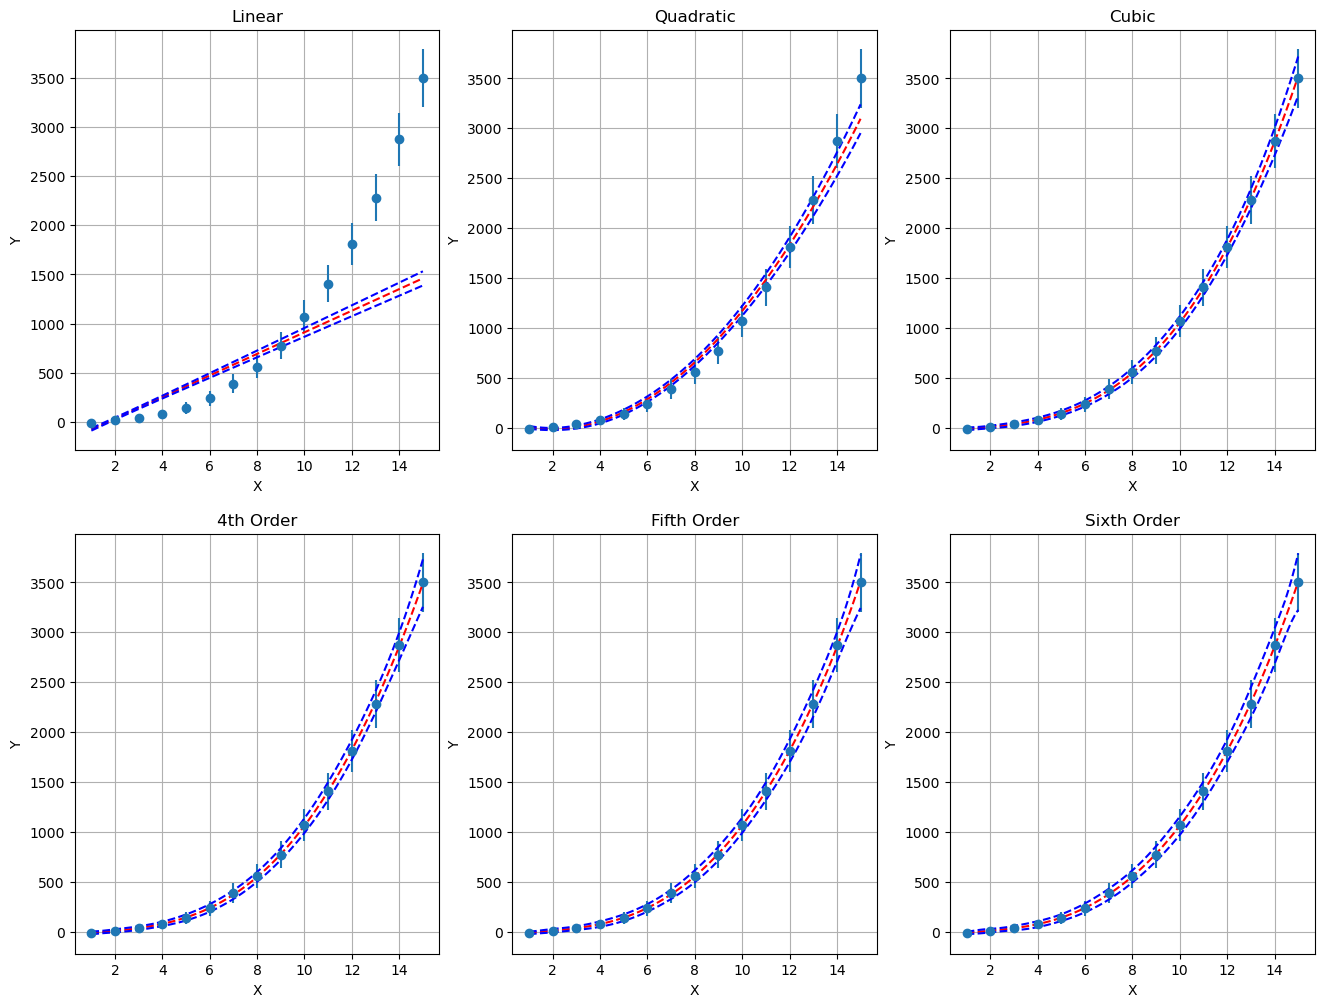

In [17]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

title = ["Linear","Quadratic","Cubic","4th Order","Fifth Order","Sixth Order"]
gr = []
max_order = 6
chi2list = array('d')
mlist = array('d')

fig, ax = plt.subplots(2,3,figsize=(16,12))

for m in range(1,max_order+1):
    m_params = m + 1
    a = np.zeros(shape = (m_params,m_params))
    v = np.zeros(shape = (m_params,1))
    for k in range(0,m_params):
        for i in range(0,n):
            v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
            #print ("v[%d] = %f" % (k,v[k][0]))
        for j in range(0,m_params):
            for i in range(0,n):
                a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
                #print ("a[%d][%d] = %f" %(k,j,a[k][j]))

    #print ("Cofactor matrix:")
    #print (a)
    #print ("Constant matrix:")
    #print (v)

    ainv = np.linalg.inv(a)
    u1 = np.dot(a,ainv)

    #print ("Inverse matrix")
    #print (ainv)
    #print ("Diagonal Check:")
    #print (u1)
    coeff = ainv*np.matrix(v)
    #print ("Coefficients:")
    #print (coeff)
    yfit = 0
    error_sum = 0
    for j in range(0,n):
        for k in range(0,m+1):
            yfit = yfit + coeff[k]*math.pow(x[j],k)
        #print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
        error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)
        yfit = 0

    chi2 = error_sum/(n-m)
    chi2list.append(chi2)
    mlist.append(m)
    print ("chi2/dof = %f / %f" % (error_sum,(n-m-1)))
    print ("Coefficients with Errors:")
    for k in range(0,m+1):
        print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))


    ax[(m-1)//3, (m-1)%3].set_title(title[m-1])
    ax[(m-1)//3, (m-1)%3].set_xlabel('X')
    ax[(m-1)//3, (m-1)%3].set_ylabel('Y')
    ax[(m-1)//3, (m-1)%3].set_yscale("linear")
    ax[(m-1)//3, (m-1)%3].grid(True)

    ax[(m-1)//3,(m-1)%3].errorbar(x,y,yerr=ey,fmt='o')

    init_vals = [0.0 for x in range(0,m_params)]
    print(init_vals)
    #popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals)
    popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals,absolute_sigma=True)

    print (popt,pcov)

    xi = np.linspace(np.min(x),np.max(x),100)
    ps = np.random.multivariate_normal(popt,pcov,10000)
    ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
    lower = np.percentile(ysample,16.0,axis=0)
    upper = np.percentile(ysample,84.0,axis=0)

    print("Coefficients (from curve_fit)")
    print (popt)
    print("Covariance Matrix (from curve_fit)")
    print (pcov)

    yfit = []
    chi2=0
    for i in range (0,n):
        yfit.append(fitfunction(x[i],*popt))
        #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
        chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(ey[i]*ey[i])

    print ("Chi^2 / dof = %.3E / %d" % (chi2,n-len(init_vals)))

    param = []
    rhom = []
    param.append(float(chi2))
    param.append(n-len(init_vals))
    for ii in range(0,len(init_vals)):
        param.append(float(popt[ii]))
        param.append(float(np.sqrt(pcov[ii][ii])))
        print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
        for jj in range(0,len(init_vals)):
            rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
            if jj > ii:
                print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

    mylabel = "Chi^2/dof = %.3E / %d\n"
    for i in range(0,len(init_vals)):
        code = "p" + str(i)
        mylabel = mylabel + code + " = %.3E +/- %.3E\n"

    ax[(m-1)//3,(m-1)%3].plot(xi, fitfunction(xi, *popt), 'r--', label = mylabel % tuple(param))
    ax[(m-1)//3,(m-1)%3].plot(xi,lower,'b--')
    ax[(m-1)//3,(m-1)%3].plot(xi,upper,'b--')


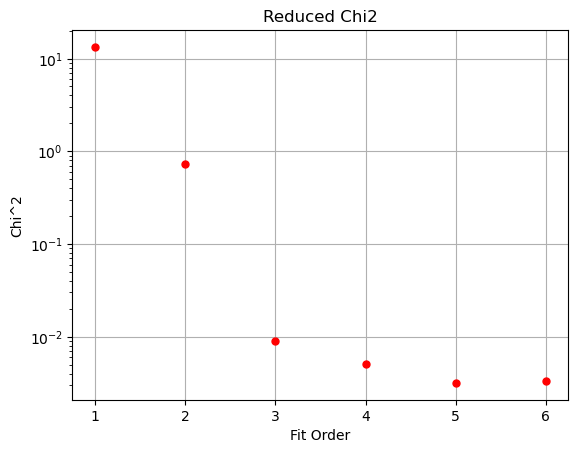

In [18]:
fig, ax = plt.subplots()

ax.set_xscale('linear')
ax.set_yscale('log')
ax.errorbar(mlist, chi2list, fmt='o', markersize=5, color='r')
ax.set_ylabel('Chi^2')
ax.set_xlabel('Fit Order')
ax.set_title('Reduced Chi2')
ax.grid(True)

plt.show()


In [19]:
import scipy.stats as stats
for m in range(1,max_order):
    fvalue = chi2list[m-1]/chi2list[m]
    fdistribution = stats.f(m,m+1)
    f_critical1 = fdistribution.ppf(0.05)
    f_critical2 = fdistribution.ppf(0.95)
    print("F = %f ... m1 = %d, m2 = %d ... F_low = %f, F_high = %f" % (fvalue,m,m+1,f_critical1,f_critical2))

F = 18.509541 ... m1 = 1, m2 = 2 ... F_low = 0.005013, F_high = 18.512821
F = 80.300538 ... m1 = 2, m2 = 3 ... F_low = 0.052180, F_high = 9.552094
F = 1.773231 ... m1 = 3, m2 = 4 ... F_low = 0.109683, F_high = 6.591382
F = 1.594813 ... m1 = 4, m2 = 5 ... F_low = 0.159845, F_high = 5.192168
F = 0.946365 ... m1 = 5, m2 = 6 ... F_low = 0.202008, F_high = 4.387374
